# Sampling functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Complete the implementations of
- UnivariateNormal
- MultivariateNormal
- Categorical
- MixtureModel

In [2]:
class ProbabilityModel:

    # Returns a single sample (independent of values returned on previous calls).
    # The returned value is an element of the model's sample space.
    def sample(self):
        pass


# The sample space of UnivariateNormal is the set of real numbers, and
# the probability measure is defined by the density function 
# p(x) = 1/(sigma * (2*pi)^(1/2)) * exp(-(x-mu)^2/2*sigma^2)

class UnivariateNormal(ProbabilityModel):
    
    # Initializes a univariate normal probability model object
    # parameterized by mu and (a positive) sigma
    def __init__(self,mu,sigma):
        self.mu = mu
        self.sigma = sigma

    def sample(self):
        return np.random.normal(self.mu, self.sigma)
       
    
# The sample space of MultiVariateNormal is the set of D dimensional real
# column vectors (modeled as numpy.array of size D x 1), and the probability 
# measure is defined by the density function 
# p(x) = 1/(det(Sigma)^(1/2) * (2*pi)^(D/2)) * exp( -(1/2) * (x-mu)^T * Sigma^-1 * (x-mu) )

class MultiVariateNormal(ProbabilityModel):
    
    # Initializes a multivariate normal probability model object 
    # parameterized by Mu (numpy.array of size D x 1) expectation vector 
    # and symmetric positive definite covariance Sigma (numpy.array of size D x D)
    def __init__(self,Mu,Sigma):
        self.Mu = Mu
        self.Sigma = Sigma

    def sample(self):
        return np.random.multivariate_normal(self.Mu, self.Sigma)

# The sample space of the Categorical model is the finite discrete set {0..k-1}, and 
# the probability measure is defined by the atomic probabilities 
# P(i) = ap[i]

class Categorical(ProbabilityModel):
    
    # Initializes a categorical (a.k.a. multinom, multinoulli, finite discrete) 
    # probability model object with distribution parameterized by the atomic probabilities vector
    # ap (numpy.array of size k).
    def __init__(self,ap):
        self.ap = ap

    def sample(self):
        return np.random.choice(len(self.ap), p=self.ap)


# The sample space of the Mixture model is the union of the sample spaces of 
# the underlying probability models, and the probability measure is defined by 
# the atomic probability vector and the densities of the supplied probability models
# p(x) = sum ad[i] p_i(x)

class MixtureModel(ProbabilityModel):
    
    # Initializes a mixture-model object parameterized by the
    # atomic probabilities vector ap (numpy.array of size k) and by the tuple of 
    # probability models pm
    def __init__(self,ap,pm):
        self.ap = ap
        self.pm = pm
    def sample(self):
        return self.pm[np.random.choice(len(self.pm), p=self.ap)].sample()


# Test your samplers
- once you complete the functions above, run each box below and keep the resulting plot in the notebook that you upload on Gradescope.

## Categorical test
- generate 10,000 samples by a categorical distribution with probabilities [0.1,0.1,0.3,0.3,0.2]
- plot a histogram of the samples using plt.hist (bins=10)

(array([1013.,    0.,  986.,    0.,    0., 3032.,    0., 2968.,    0.,
        2001.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

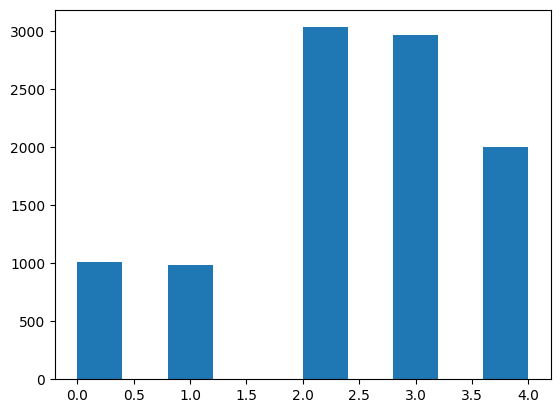

In [3]:
probabilities = [0.1,0.1,0.3,0.3,0.2]
pm = Categorical(probabilities)
plt.hist([pm.sample() for _ in range(10000)], bins=10)

## UnivariateNormal test
- generate 10,000 samples from the distribution with mean = 0, std = 1
- print the mean and std of the samples using np.mean and np.std
- plot a histogram of the samples using plt.hist with bins=100

Mean:  -0.016630737942657976
Std:  0.9901278377655255


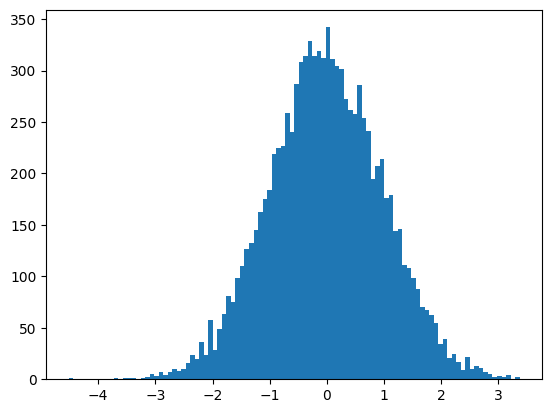

In [4]:
mean = 0
std = 1
pm = UnivariateNormal(mean, std)
generated_samples = [pm.sample() for _ in range(10000)]
plt.hist(generated_samples, bins=100)
print("Mean: ", np.mean(generated_samples))
print("Std: ", np.std(generated_samples))

## MultivariateNormal test
- generate 10,000 samples for a 2-D Gaussian with mean at [1,1] and a covariance matrix [[1,0.5],[0.5,1]]
- print the mean and covariance of the samples using np.mean and np.cov
- produce a scatterplot of the 2-D samples using plt.scatter

Mean:  1.012105207009038
Cov:  [[ 2.29454373  0.80659968 -0.60486799 ...  0.63395643  2.00218685
  -0.09417101]
 [ 0.80659968  0.28354354 -0.21262891 ...  0.22285435  0.70382763
  -0.03310388]
 [-0.60486799 -0.21262891  0.15945013 ... -0.16711817 -0.52779937
   0.02482455]
 ...
 [ 0.63395643  0.22285435 -0.16711817 ...  0.17515498  0.55318154
  -0.02601838]
 [ 2.00218685  0.70382763 -0.52779937 ...  0.55318154  1.74708032
  -0.08217231]
 [-0.09417101 -0.03310388  0.02482455 ... -0.02601838 -0.08217231
   0.0038649 ]]


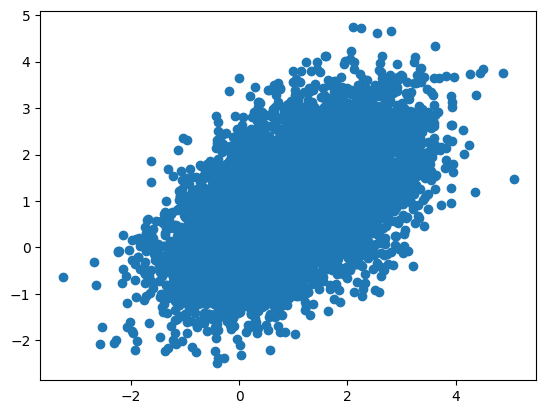

In [5]:
mean = [1,1]
cov = [[1,0.5],[0.5,1]]
pm = MultiVariateNormal(mean, cov)
generated_samples = [pm.sample() for _ in range(10000)]
plt.scatter([x[0] for x in generated_samples], [x[1] for x in generated_samples])
print("Mean: ", np.mean(generated_samples))
print("Cov: ", np.cov(generated_samples))

## MixtureModel test
- Construct a mixture model consisting of an equal-weighted mixture of four Gaussians in 2 dimensions, centered at (2,2), (2,-2), (-2,2) and (-2,-2),  and having covariance $$I$$
- generate 100,000 samples from this mixture
- generate a scatter plot of samples using plt.scatter
- What is the probability that a point in this sample lies within a unit circle centered at (1,1)?  Print that probabillity.

Chance of being within circle:  0.0483


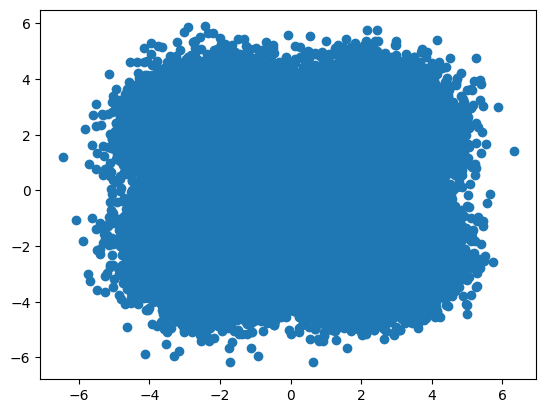

In [6]:
g1 = MultiVariateNormal([2,2], [[1,0],[0,1]])
g2 = MultiVariateNormal([2,-2], [[1,0],[0,1]])
g3 = MultiVariateNormal([-2,2], [[1,0],[0,1]])
g4 = MultiVariateNormal([-2,-2], [[1,0],[0,1]])
pm = MixtureModel([0.25,0.25,0.25,0.25],[g1,g2,g3,g4])
generated_samples = [pm.sample() for _ in range(100000)]
plt.scatter([x[0] for x in generated_samples], [x[1] for x in generated_samples])

def check_within_circle(sample):
    center = [1, 1]
    dist = np.linalg.norm(center - sample)
    return dist <= 1

count = sum(1 for sample in generated_samples if check_within_circle(sample))
print("Chance of being within circle: ", count / 100000)